In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

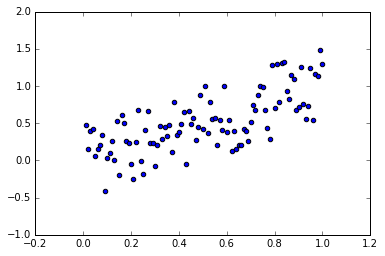

In [48]:
n = 100
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

In [49]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
model.coef_, model.intercept_

(array([ 0.94436939]), 0.039950149848324568)

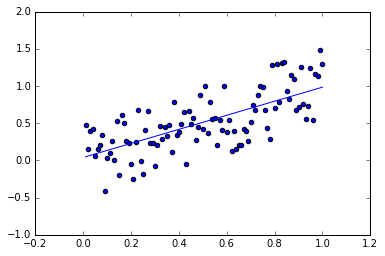

In [51]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## How do we "test" this model on "new" data if we don't have a new dataset?

### Instead of using all of our data to produce this model, let's use some, and save the rest as a reserve 

In [52]:
model = LinearRegression()
model.fit(x[:50], y[:50])
model.coef_, model.intercept_

(array([ 0.72422836]), 0.10943371973978758)

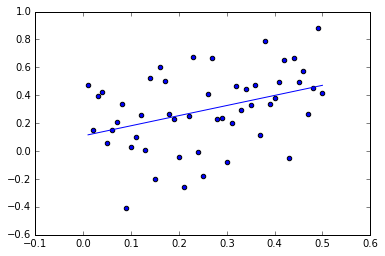

In [53]:
plt.scatter(x[:50],y[:50])
plt.plot(x[:50], np.dot(x[:50], model.coef_) + model.intercept_)

## Our slope doesn't match the previous slope with all the data. Why not? 
## Let's plot all of our data with this model to see

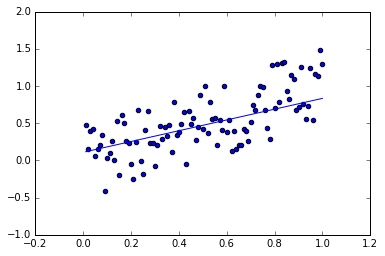

In [54]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## We only used the first half of our data and neglected the second half. 

### Let's try this again differently. Let's shuffle our data first

In [55]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p

In [56]:
p = shuffle(x, y)

In [57]:
p

array([56, 82, 97, 25, 19, 35, 71, 43, 40,  0, 51,  8, 54, 73, 24, 27, 34,
       39, 76, 28, 20, 30, 78, 48, 91, 96, 88, 83, 31, 26, 66,  3, 95, 80,
       50, 93,  7, 17, 92, 33,  4, 60, 61,  2, 36, 45, 29, 21, 52, 22,  9,
       42,  1, 46, 11, 74, 63, 86, 18, 47, 44, 49, 90,  6, 16, 53, 23, 94,
       70,  5, 79, 87, 58, 75, 62, 98, 37, 85, 14, 38, 72, 68, 64, 69, 89,
       99, 67, 32, 15, 12, 10, 77, 41, 55, 84, 59, 13, 57, 65, 81])

In [62]:
x[[2, 0, 1, 4]]

array([[ 0.03],
       [ 0.01],
       [ 0.02],
       [ 0.05]])

In [64]:
x[p], y[p]

(array([[ 0.57],
        [ 0.83],
        [ 0.98],
        [ 0.26],
        [ 0.2 ],
        [ 0.36],
        [ 0.72],
        [ 0.44],
        [ 0.41],
        [ 0.01],
        [ 0.52],
        [ 0.09],
        [ 0.55],
        [ 0.74],
        [ 0.25],
        [ 0.28],
        [ 0.35],
        [ 0.4 ],
        [ 0.77],
        [ 0.29],
        [ 0.21],
        [ 0.31],
        [ 0.79],
        [ 0.49],
        [ 0.92],
        [ 0.97],
        [ 0.89],
        [ 0.84],
        [ 0.32],
        [ 0.27],
        [ 0.67],
        [ 0.04],
        [ 0.96],
        [ 0.81],
        [ 0.51],
        [ 0.94],
        [ 0.08],
        [ 0.18],
        [ 0.93],
        [ 0.34],
        [ 0.05],
        [ 0.61],
        [ 0.62],
        [ 0.03],
        [ 0.37],
        [ 0.46],
        [ 0.3 ],
        [ 0.22],
        [ 0.53],
        [ 0.23],
        [ 0.1 ],
        [ 0.43],
        [ 0.02],
        [ 0.47],
        [ 0.12],
        [ 0.75],
        [ 0.64],
        [ 0.87],
        [ 0.19

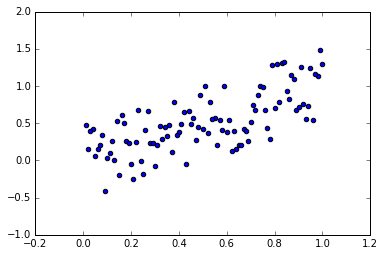

In [65]:
plt.scatter(x[p],y[p])

### Still plots the same scatter plot

### So, let's use the first 50 points of the shuffled data instead and see if the model is similar 

In [66]:
model = LinearRegression()
model.fit(x[p][:50], y[p][:50])
model.coef_, model.intercept_


(array([ 0.92869184]), 0.07005237883029608)

### Success! We got a similar slope as before with half of the points 

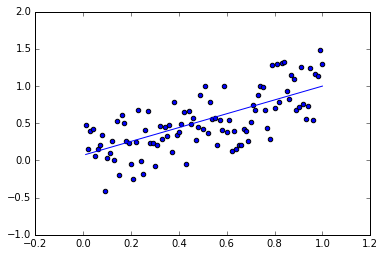

In [67]:

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

###  So how do we check the validity of the model on the rest of the points? The loss (Error) function of course!
### $E = \Sigma y - \hat{y} = \Sigma y - \beta \cdot x$

### $E = \frac{1}{N}\Sigma y - \hat{y} = \frac{1}{N}\Sigma y - \beta \cdot x$
### Why divide by N? 
This way we have a _mean_ error that's invariant to the number of points you use to build your model. Otherwise, your error would increase with the number of points

In [68]:
np.dot(x[50:], model.coef_) + model.intercept_

array([ 0.54368522,  0.55297214,  0.56225906,  0.57154597,  0.58083289,
        0.59011981,  0.59940673,  0.60869365,  0.61798057,  0.62726748,
        0.6365544 ,  0.64584132,  0.65512824,  0.66441516,  0.67370208,
        0.682989  ,  0.69227591,  0.70156283,  0.71084975,  0.72013667,
        0.72942359,  0.73871051,  0.74799742,  0.75728434,  0.76657126,
        0.77585818,  0.7851451 ,  0.79443202,  0.80371893,  0.81300585,
        0.82229277,  0.83157969,  0.84086661,  0.85015353,  0.85944045,
        0.86872736,  0.87801428,  0.8873012 ,  0.89658812,  0.90587504,
        0.91516196,  0.92444887,  0.93373579,  0.94302271,  0.95230963,
        0.96159655,  0.97088347,  0.98017038,  0.9894573 ,  0.99874422])

In [69]:
y[50:] - np.dot(x[50:], model.coef_) + model.intercept_

array([ 0.59566636, -0.0442322 ,  0.35992899,  0.13075334,  0.12896415,
       -0.24264708,  0.07898697, -0.05620153,  0.51818415, -0.09984931,
        0.04771726, -0.38557386, -0.11668815, -0.37754742, -0.32588822,
       -0.33058502, -0.128927  , -0.16298682, -0.30563221, -0.06206548,
        0.15176408,  0.08444744,  0.27173125,  0.37846622,  0.35650884,
        0.04383829, -0.20912934, -0.36430569,  0.62373304,  0.0267788 ,
        0.61050514,  0.08945836,  0.60269056,  0.60589594,  0.20736083,
        0.09695588,  0.4065607 ,  0.34842807, -0.07866247, -0.04517918,
        0.4763899 , -0.02747228, -0.23266378, -0.07440899,  0.42306114,
       -0.2723366 ,  0.32901276,  0.29774271,  0.63600186,  0.44002294])

In [ ]:
np.square(y[50:] - np.dot(x[50:], model.coef_) + model.intercept_)

In [ ]:
np.sum(np.square(y[50:] - np.dot(x[50:], model.coef_) + model.intercept_))

In [ ]:
np.sum(np.square(y[50:] - np.dot(x[50:], model.coef_) + model.intercept_))/50

### Is there a shorter way of calculating this error?
Why yes, of course! Scikit-Learn to the rescue

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y[50:], np.dot(x[50:], model.coef_) + model.intercept_)

### Why the slight discrepancy in values? 
Let's check the Documentation
[http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error]

Turns out sklearn sums N-1 values and not all N because Statistics
[http://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance]

## Is there an easier way to shuffle the data?
I'm glad you asked [http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

In [ ]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

In [ ]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)